In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import pickle

import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
import pandas as pd
dfzomatodataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='latin-1')
dfcountrycode = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx", engine='openpyxl')



Info for Zomato Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 

In [3]:
dfmerged=pd.merge(dfzomatodataset,dfcountrycode)
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
dfmerged['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [5]:
dfmerged.groupby("Country").agg(Total_Count=("Restaurant ID","count")).sort_values(by="Total_Count",ascending=False)

Total_Count
Country                    
India                  8652
United States           434
United Kingdom           80
Brazil                   60
South Africa             60
UAE                      60
New Zealand              40
Turkey                   34
Australia                24
Phillipines              22
Indonesia                21
Qatar                    20
Singapore                20
Sri Lanka                20
Canada                    4

In [6]:
df1=dfmerged[dfmerged["Country"]=="India"].reset_index(drop=True).copy()

In [7]:
df1.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
0        3400025                             Jahanpanah             1  Agra   
1        3400341                    Rangrezz Restaurant             1  Agra   
2        3400005                Time2Eat - Mama Chicken             1  Agra   
3        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
4        3400017                         Pinch Of Spice             1  Agra   

                                             Address     Locality  \
0  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
1  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
2        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
3  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
4  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

    Locality Verbose  Longitude   Latitude                        Cuisines  \
0   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
1   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
2   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
3  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
4  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

   ...  Has Table booking Has Online delivery Is delivering now  \
0  ...                 No                  No                No   
1  ...                 No                  No                No   
2  ...                 No                  No                No   
3  ...                 No                  No                No   
4  ...                 No                  No                No   

  Switch to order menu Price range Aggregate rating  Rating color  \
0                   No           3              3.9        Yellow   
1                   No           2              3.5        Yellow   
2                   No           2              3.6        Yellow   
3                   No           2              4.0         Green   
4                   No           3              4.2         Green   

   Rating text Votes Country  
0         Good   140   India  
1         Good    71   India  
2         Good    94   India  
3    Very Good    87   India  
4    Very Good   177   India  

[5 rows x 22 columns]

In [8]:
df1.tail()

Restaurant ID           Restaurant Name  Country Code   City  \
8647        2800100                  D Cabana             1  Vizag   
8648        2800418                  Kaloreez             1  Vizag   
8649        2800881                   Plot 17             1  Vizag   
8650        2800042          Vista - The Park             1  Vizag   
8651        2800019  Flying Spaghetti Monster             1  Vizag   

                                                Address  \
8647  Beach Road, Near Bus Stop, Sagar Nagar, Visakh...   
8648  Plot 95, Opposite St. Lukes Nursing School, Da...   
8649         Plot 17, Gangapur Layout, Siripuram, Vizag   
8650  The Park, Beach Road, Pedda Waltair, Lawsons B...   
8651  10-50-12/F2, Sai Dakshata Complex, Beside Leno...   

                   Locality              Locality Verbose  Longitude  \
8647            Sagar Nagar            Sagar Nagar, Vizag  83.361377   
8648              Siripuram              Siripuram, Vizag   0.000000   
8649              Siripuram              Siripuram, Vizag  83.315281   
8650  The Park, Lawsons Bay  The Park, Lawsons Bay, Vizag  83.336840   
8651        Waltair Uplands        Waltair Uplands, Vizag  83.314942   

       Latitude                                           Cuisines  ...  \
8647  17.764287  Continental, Seafood, Chinese, North Indian, B...  ...   
8648   0.000000                        Cafe, North Indian, Chinese  ...   
8649  17.719539                             Burger, Pizza, Biryani  ...   
8650  17.721182          American, North Indian, Thai, Continental  ...   
8651  17.721119                                            Italian  ...   

      Has Table booking Has Online delivery Is delivering now  \
8647                 No                  No                No   
8648                 No                  No                No   
8649                 No                  No                No   
8650                 No                  No                No   
8651                 No                  No                No   

     Switch to order menu Price range Aggregate rating  Rating color  \
8647                   No           2              3.6        Yellow   
8648                   No           2              3.7        Yellow   
8649                   No           2              4.3         Green   
8650                   No           4              3.8        Yellow   
8651                   No           3              4.4         Green   

      Rating text Votes Country  
8647         Good   193   India  
8648         Good    85   India  
8649    Very Good   172   India  
8650         Good    74   India  
8651    Very Good   316   India  

[5 rows x 22 columns]

In [9]:
print(df1.shape)
print(' ')
print(df1.dtypes)

(8652, 22)
 
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object


In [10]:
df1.shape

(8652, 22)

In [11]:
df1.duplicated().sum()

0

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu 

In [13]:
#total missing values
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
df1.select_dtypes(np.number).columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [15]:
df1.select_dtypes('object').columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

In [16]:
print(len(df1.select_dtypes('object').columns))
print(len(df1.select_dtypes(np.number).columns))

14
8


In [17]:
columns = df1.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_").lower() for column in columns]
df1.columns = columns_renamed
df1.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes', 'country'],
      dtype='object')

In [18]:
df2=df1.copy()

In [19]:
df2

restaurant_id                        restaurant_name  country_code  \
0           3400025                             Jahanpanah             1   
1           3400341                    Rangrezz Restaurant             1   
2           3400005                Time2Eat - Mama Chicken             1   
3           3400021  Chokho Jeeman Marwari Jain Bhojanalya             1   
4           3400017                         Pinch Of Spice             1   
...             ...                                    ...           ...   
8647        2800100                               D Cabana             1   
8648        2800418                               Kaloreez             1   
8649        2800881                                Plot 17             1   
8650        2800042                       Vista - The Park             1   
8651        2800019               Flying Spaghetti Monster             1   

       city                                            address  \
0      Agra  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   
1      Agra  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   
2      Agra        Main Market, Sadar Bazaar, Agra Cantt, Agra   
3      Agra  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...   
4      Agra  23/453, Opposite Sanjay Cinema, Wazipura Road,...   
...     ...                                                ...   
8647  Vizag  Beach Road, Near Bus Stop, Sagar Nagar, Visakh...   
8648  Vizag  Plot 95, Opposite St. Lukes Nursing School, Da...   
8649  Vizag         Plot 17, Gangapur Layout, Siripuram, Vizag   
8650  Vizag  The Park, Beach Road, Pedda Waltair, Lawsons B...   
8651  Vizag  10-50-12/F2, Sai Dakshata Complex, Beside Leno...   

                   locality              locality_verbose  longitude  \
0                Agra Cantt              Agra Cantt, Agra  78.011544   
1                Agra Cantt              Agra Cantt, Agra   0.000000   
2                Agra Cantt              Agra Cantt, Agra  78.011608   
3               Civil Lines             Civil Lines, Agra  77.998092   
4               Civil Lines             Civil Lines, Agra  78.007553   
...                     ...                           ...        ...   
8647            Sagar Nagar            Sagar Nagar, Vizag  83.361377   
8648              Siripuram              Siripuram, Vizag   0.000000   
8649              Siripuram              Siripuram, Vizag  83.315281   
8650  The Park, Lawsons Bay  The Park, Lawsons Bay, Vizag  83.336840   
8651        Waltair Uplands        Waltair Uplands, Vizag  83.314942   

       latitude                                           cuisines  ...  \
0     27.161661                              North Indian, Mughlai  ...   
1      0.000000                              North Indian, Mughlai  ...   
2     27.160832                                       North Indian  ...   
3     27.195928                                         Rajasthani  ...   
4     27.201725                     North Indian, Chinese, Mughlai  ...   
...         ...                                                ...  ...   
8647  17.764287  Continental, Seafood, Chinese, North Indian, B...  ...   
8648   0.000000                        Cafe, North Indian, Chinese  ...   
8649  17.719539                             Burger, Pizza, Biryani  ...   
8650  17.721182          American, North Indian, Thai, Continental  ...   
8651  17.721119                                            Italian  ...   

      has_table_booking has_online_delivery is_delivering_now  \
0                    No                  No                No   
1                    No                  No                No   
2                    No                  No                No   
3                    No                  No                No   
4                    No                  No                No   
...                 ...                 ...               ...   
8647                 No                  No                No   
8648          

In [20]:
df2['average_cost_for_two'].sort_values()

227        0
15         0
13         0
1740       0
10         0
        ... 
6868    6000
6875    6000
3463    6500
3464    7000
6919    8000
Name: average_cost_for_two, Length: 8652, dtype: int64

In [21]:
df2['average_cost_for_two'].unique()

array([ 850,  700,  500,  400, 1000, 2000, 2500,  800, 3600,    0,  550,
       1100, 1500,  900, 1800,  300, 1400,  350,  450,  600,  950, 1200,
        200,  100,  150,  650, 1300, 2400,  250, 1600, 2200,  750, 1700,
       1250, 1900, 2700, 3500, 5000, 2300, 1750, 3200, 3000, 2100, 1850,
       4500, 4000, 3300,  120, 1350, 1650, 1950, 1050,  290,   50, 1450,
       2800,  260, 3650, 4800, 1550,  720, 6500, 7000, 1150, 2900, 2600,
       4700, 3700, 3800, 4100, 4300, 2650, 6000, 5100, 5500, 4400, 4200,
       8000, 2350], dtype=int64)

In [22]:
df2[df2==0].count()

restaurant_id              0
restaurant_name            0
country_code               0
city                       0
address                    0
locality                   0
locality_verbose           0
longitude                496
latitude                 495
cuisines                   0
average_cost_for_two       9
currency                   0
has_table_booking          0
has_online_delivery        0
is_delivering_now          0
switch_to_order_menu       0
price_range                0
aggregate_rating        2139
rating_color               0
rating_text                0
votes                   1093
country                    0
dtype: int64

In [23]:
df2.replace(0,np.nan,inplace=True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         8652 non-null   int64  
 1   restaurant_name       8652 non-null   object 
 2   country_code          8652 non-null   int64  
 3   city                  8652 non-null   object 
 4   address               8652 non-null   object 
 5   locality              8652 non-null   object 
 6   locality_verbose      8652 non-null   object 
 7   longitude             8156 non-null   float64
 8   latitude              8157 non-null   float64
 9   cuisines              8652 non-null   object 
 10  average_cost_for_two  8643 non-null   float64
 11  currency              8652 non-null   object 
 12  has_table_booking     8652 non-null   object 
 13  has_online_delivery   8652 non-null   object 
 14  is_delivering_now     8652 non-null   object 
 15  switch_to_order_menu 

In [130]:
df3=pd.DataFrame(data=df2)
df3=df3.dropna(subset=['longitude'])
df3=df3.reset_index(drop = True)


In [26]:
df3['switch_to_order_menu'].value_counts()

switch_to_order_menu
No    8156
Name: count, dtype: int64

In [27]:
df3.drop('switch_to_order_menu', axis = 1, inplace = True)

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         8156 non-null   int64  
 1   restaurant_name       8156 non-null   object 
 2   country_code          8156 non-null   int64  
 3   city                  8156 non-null   object 
 4   address               8156 non-null   object 
 5   locality              8156 non-null   object 
 6   locality_verbose      8156 non-null   object 
 7   longitude             8156 non-null   float64
 8   latitude              8156 non-null   float64
 9   cuisines              8156 non-null   object 
 10  average_cost_for_two  8149 non-null   float64
 11  currency              8156 non-null   object 
 12  has_table_booking     8156 non-null   object 
 13  has_online_delivery   8156 non-null   object 
 14  is_delivering_now     8156 non-null   object 
 15  price_range          

In [29]:
df3["aggregate_rating"].fillna(df3["aggregate_rating"].mean(), inplace=True)
df3["votes"].fillna(df3["votes"].mean(), inplace=True)
df3["average_cost_for_two"].fillna(df3["average_cost_for_two"].mode()[0], inplace=True)

In [30]:
df4=df3.copy()

In [31]:
df4.isnull().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
country                 0
dtype: int64

In [32]:
df4.drop(columns=["restaurant_name",'country_code','address','locality','currency','country'], inplace  =True)

In [33]:
df5=df4.copy()

In [34]:
df5.describe(exclude=[object]).T

count          mean           std        min  \
restaurant_id         8156.0  8.286629e+06  8.942283e+06  53.000000   
longitude             8156.0  7.728751e+01  1.376510e+00  34.000000   
latitude              8156.0  2.802397e+01  2.586650e+00   9.957144   
average_cost_for_two  8156.0  6.325625e+02  6.065271e+02  50.000000   
price_range           8156.0  1.730260e+00  8.555063e-01   1.000000   
aggregate_rating      8156.0  3.347088e+00  4.446534e-01   1.800000   
votes                 8156.0  1.622244e+02  4.367400e+02   1.000000   

                                25%            50%           75%           max  
restaurant_id         122048.750000  312794.000000  1.835267e+07  1.850063e+07  
longitude                 77.117078      77.207756  7.729057e+01  9.180649e+01  
latitude                  28.520003      28.574172  2.864038e+01  3.500000e+01  
average_cost_for_two     300.000000     500.000000  7.000000e+02  8.000000e+03  
price_range                1.000000       2.000000  2.000000e+00  4.000000e+00  
aggregate_rating           3.100000       3.347088  3.600000e+00  4.900000e+00  
votes                     12.000000      50.000000  1.622244e+02  1.093400e+04

In [35]:
df5.describe(include=[object])

city            locality_verbose      cuisines has_table_booking  \
count        8156                        8156          8156              8156   
unique         43                         806          1321                 2   
top     New Delhi  Connaught Place, New Delhi  North Indian                No   
freq         5240                         122           877              7062   

       has_online_delivery is_delivering_now rating_color rating_text  
count                 8156              8156         8156        8156  
unique                   2                 2            6           6  
top                     No                No       Orange     Average  
freq                  5740              8122         3575        3575

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats
from scipy.stats import skew

In [38]:
import plotly.graph_objects as go

labels = list(df5.city.value_counts().head(20).index)
values = list(df5.city.value_counts().head(20).values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.6,title="Zomato's Presence Citywise")])
fig.show()


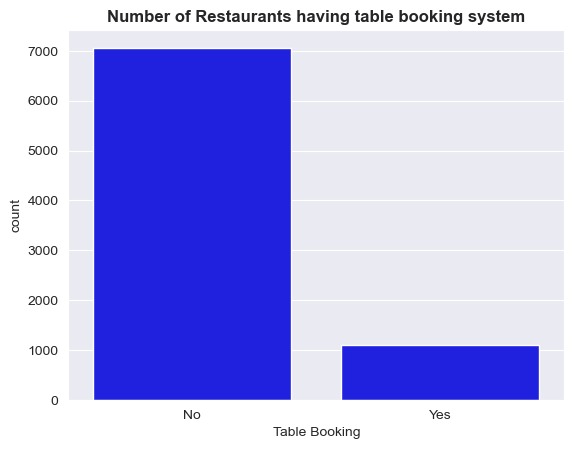

In [39]:
sns.countplot(x='has_table_booking', data=df5, color='blue')
plt.title('Number of Restaurants having table booking system', weight='bold')
plt.xlabel('Table Booking')
plt.show()


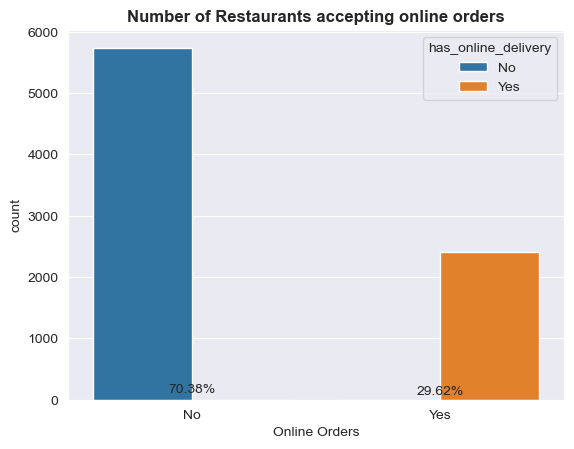

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame
sns.countplot(x='has_online_delivery', data=df5, hue='has_online_delivery')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('Online Orders')

# Calculate and display percentage on top of each bar
online_delivery_percentage = df5['has_online_delivery'].value_counts(normalize=True) * 100
for i, percentage in enumerate(online_delivery_percentage):
    plt.text(i, percentage + 1, f'{round(percentage, 2)}%', ha='center', va='bottom')

plt.show()


In [41]:
df5['is_delivering_now'].value_counts()

is_delivering_now
No     8122
Yes      34
Name: count, dtype: int64

In [42]:
df5['price_range'].value_counts()

price_range
1    4009
2    2710
3    1065
4     372
Name: count, dtype: int64

In [43]:
cuisine_val = df5.cuisines.value_counts()             
cuisine_label = df5.cuisines.value_counts().index 
fig = go.Figure(data=[go.Pie(labels=cuisine_label[:10], values=cuisine_val[:10], textinfo='label+percent',
                             insidetextorientation='radial',title='Top 10 Cuisine'
                            )])
fig.show()

<Axes: xlabel='average_cost_for_two', ylabel='aggregate_rating'>

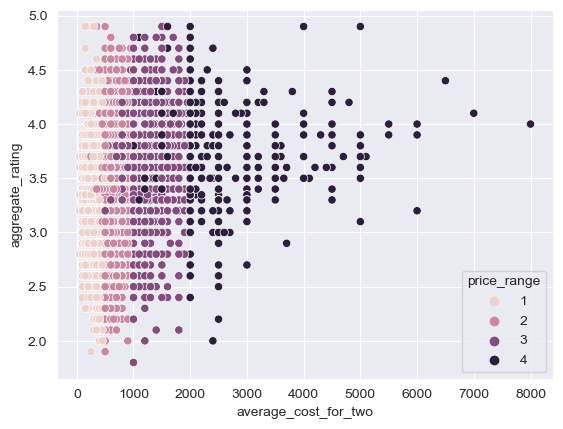

In [44]:
sns.scatterplot(data=df5,x='average_cost_for_two',y='aggregate_rating',hue='price_range')

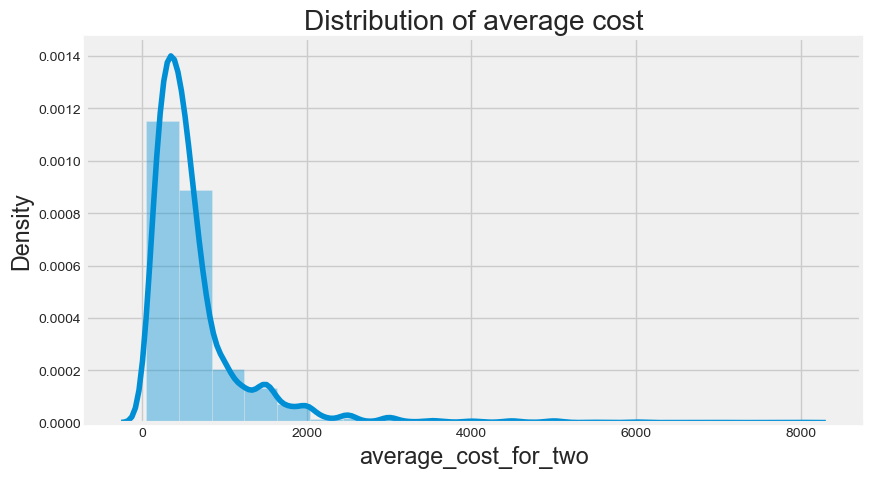

In [45]:
# Creating a distribution plot for 'average_cost_for_two'
average_cost= df5['average_cost_for_two'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df5['average_cost_for_two'], bins=20)
plt.title('Distribution of average cost')
plt.tick_params(labelsize=10)
plt.show()

In [46]:
df5['average_cost_for_two'].describe()

count    8156.000000
mean      632.562531
std       606.527081
min        50.000000
25%       300.000000
50%       500.000000
75%       700.000000
max      8000.000000
Name: average_cost_for_two, dtype: float64

Text(0.5, 1.0, 'average cost after transformation')

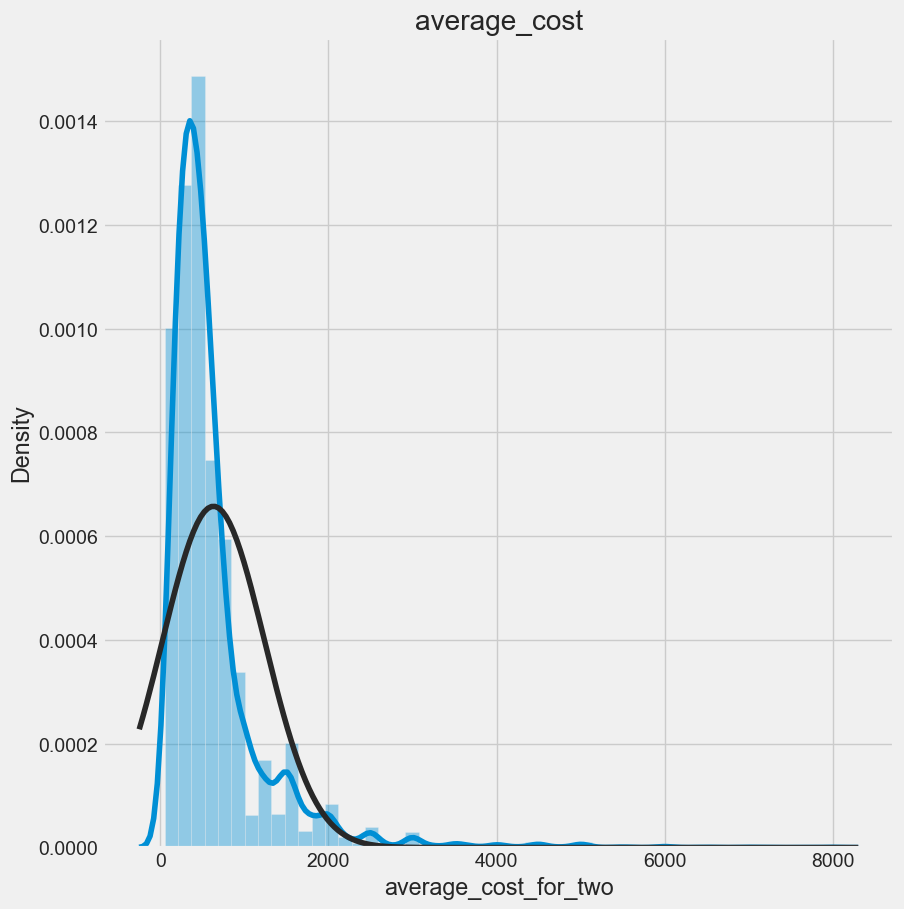

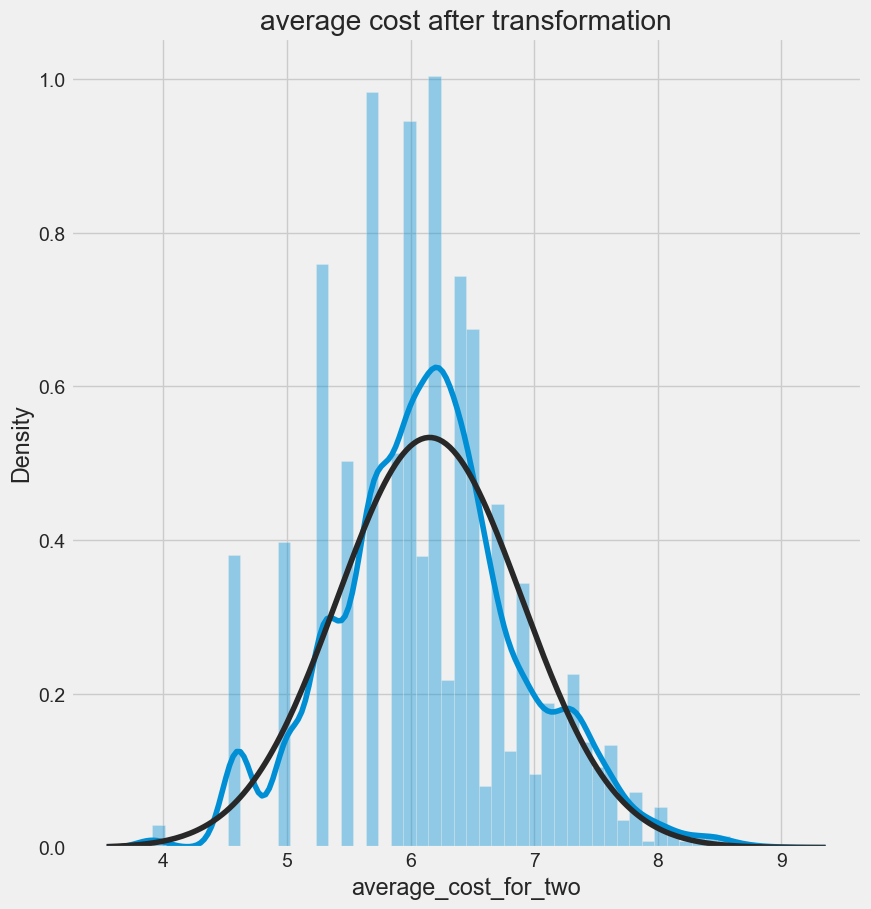

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df5['average_cost_for_two'],kde=True,fit=scipy.stats.norm)
plt.title("average_cost")

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(np.log(df5['average_cost_for_two']),kde=True,fit=scipy.stats.norm)
plt.title("average cost after transformation")

In [48]:
df6=df5.copy()

In [49]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         8156 non-null   int64  
 1   city                  8156 non-null   object 
 2   locality_verbose      8156 non-null   object 
 3   longitude             8156 non-null   float64
 4   latitude              8156 non-null   float64
 5   cuisines              8156 non-null   object 
 6   average_cost_for_two  8156 non-null   float64
 7   has_table_booking     8156 non-null   object 
 8   has_online_delivery   8156 non-null   object 
 9   is_delivering_now     8156 non-null   object 
 10  price_range           8156 non-null   int64  
 11  aggregate_rating      8156 non-null   float64
 12  rating_color          8156 non-null   object 
 13  rating_text           8156 non-null   object 
 14  votes                 8156 non-null   float64
dtypes: float64(5), int64(

In [50]:
import scipy.stats
from scipy.stats import skew

In [51]:
skew_df=pd.DataFrame(df6.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df6[feature]))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
skew_df

Feature      Skew  Absolute Skew  Skewed
0         restaurant_id  0.227449       0.227449   False
1             longitude  0.886136       0.886136    True
2              latitude -4.952231       4.952231    True
3  average_cost_for_two  3.547176       3.547176    True
4           price_range  0.983572       0.983572    True
5      aggregate_rating  0.258739       0.258739   False
6                 votes  9.474986       9.474986    True

In [52]:
skew_df.query("Skewed == True")['Feature']

1               longitude
2                latitude
3    average_cost_for_two
4             price_range
6                   votes
Name: Feature, dtype: object

In [53]:
for column in skew_df.query("Skewed==True")['Feature'].values:
    df6[column]=np.log1p(df6[column])

In [54]:
skew_df=pd.DataFrame(df6.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df6[feature]))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
skew_df

Feature      Skew  Absolute Skew  Skewed
0         restaurant_id  0.227449       0.227449   False
1             longitude -7.305176       7.305176    True
2              latitude -5.564673       5.564673    True
3  average_cost_for_two  0.200076       0.200076   False
4           price_range  0.575908       0.575908    True
5      aggregate_rating  0.258739       0.258739   False
6                 votes -0.043688       0.043688   False

In [55]:
df7=df6.copy()

In [56]:
df7

restaurant_id   city              locality_verbose  longitude  latitude  \
0           3400025   Agra              Agra Cantt, Agra   4.369594  3.337962   
1           3400005   Agra              Agra Cantt, Agra   4.369595  3.337932   
2           3400021   Agra             Civil Lines, Agra   4.369424  3.339178   
3           3400017   Agra             Civil Lines, Agra   4.369543  3.339383   
4           3400059   Agra     ITC Mughal, Tajganj, Agra   4.370006  3.337936   
...             ...    ...                           ...        ...       ...   
8151        2800128  Vizag             Rushikonda, Vizag   4.435364  2.932998   
8152        2800100  Vizag            Sagar Nagar, Vizag   4.435110  2.931955   
8153        2800881  Vizag              Siripuram, Vizag   4.434563  2.929568   
8154        2800042  Vizag  The Park, Lawsons Bay, Vizag   4.434819  2.929656   
8155        2800019  Vizag        Waltair Uplands, Vizag   4.434559  2.929652   

                                               cuisines  average_cost_for_two  \
0                                 North Indian, Mughlai              6.746412   
1                                          North Indian              6.216606   
2                                            Rajasthani              5.993961   
3                        North Indian, Chinese, Mughlai              6.908755   
4                                 North Indian, Mughlai              7.824446   
...                                                 ...                   ...   
8151                                    Biryani, Andhra              6.111467   
8152  Continental, Seafood, Chinese, North Indian, B...              6.398595   
8153                             Burger, Pizza, Biryani              6.398595   
8154          American, North Indian, Thai, Continental              7.313887   
8155                                            Italian              7.244942   

     has_table_booking has_online_delivery is_delivering_now  price_range  \
0                   No                  No                No     1.386294   
1                   No                  No                No     1.098612   
2                   No                  No                No     1.098612   
3                   No                  No                No     1.386294   
4                   No                  No                No     1.609438   
...                ...                 ...               ...          ...   
8151                No                  No                No     1.098612   
8152                No                  No                No     1.098612   
8153                No                  No                No     1.098612   
8154                No                  No                No     1.609438   
8155                No                  No                No     1.386294   

      aggregate_rating rating_color rating_text     votes  
0                  3.9       Yellow        Good  4.948760  
1                  3.6       Yellow        Good  4.553877  
2                  4.0        Green   Very Good  4.477337  
3                  4.2        Green   Very Good  5.181784  
4                  4.3        Green   Very Good  4.897840  
...                ...          ...         ...       ...  
8151               4.0        Green   Very Good  5.135798  
8152               3.6       Yellow        Good  5.267858  
8153               4.3        Green   Very Good  5.153292  
8154               3.8       Yellow        Good  4.317488  
8155               4.4        Green   Very Good  5.758902  

[8156 rows x 15 columns]

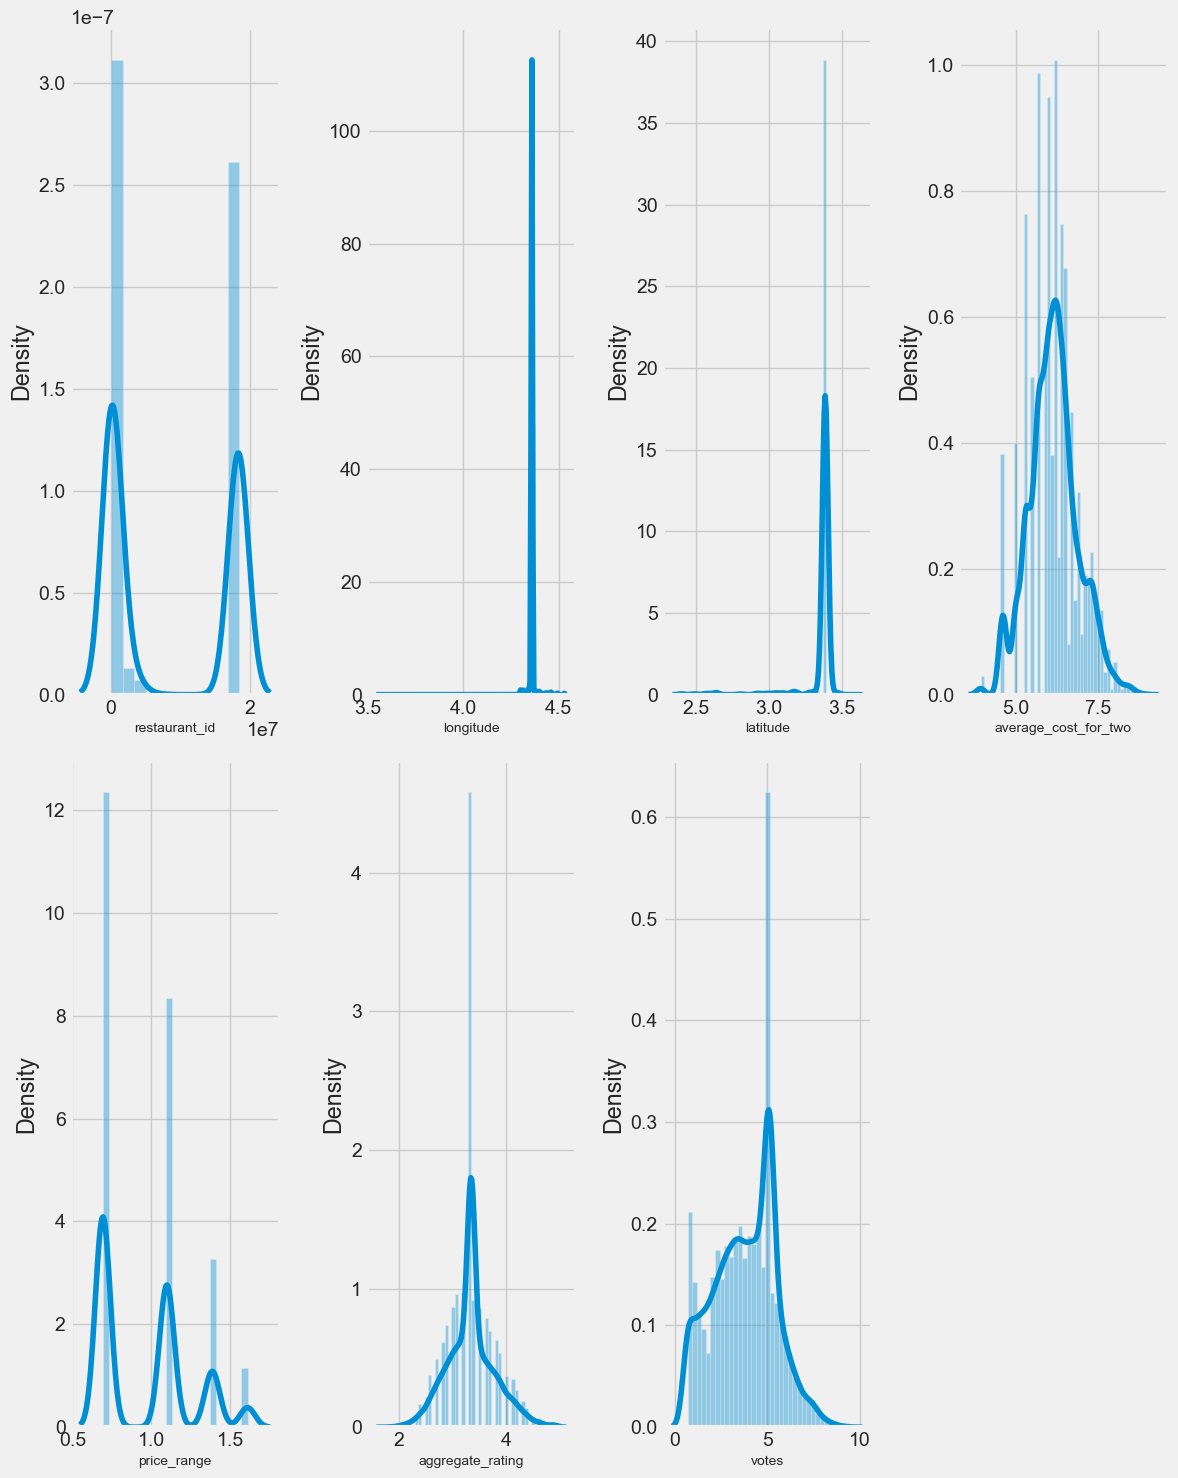

In [57]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(12,15))
for column in df7.select_dtypes(np.number).columns:
    plt.subplot(2,4,i+1)
    sns.distplot(df7[column])
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()

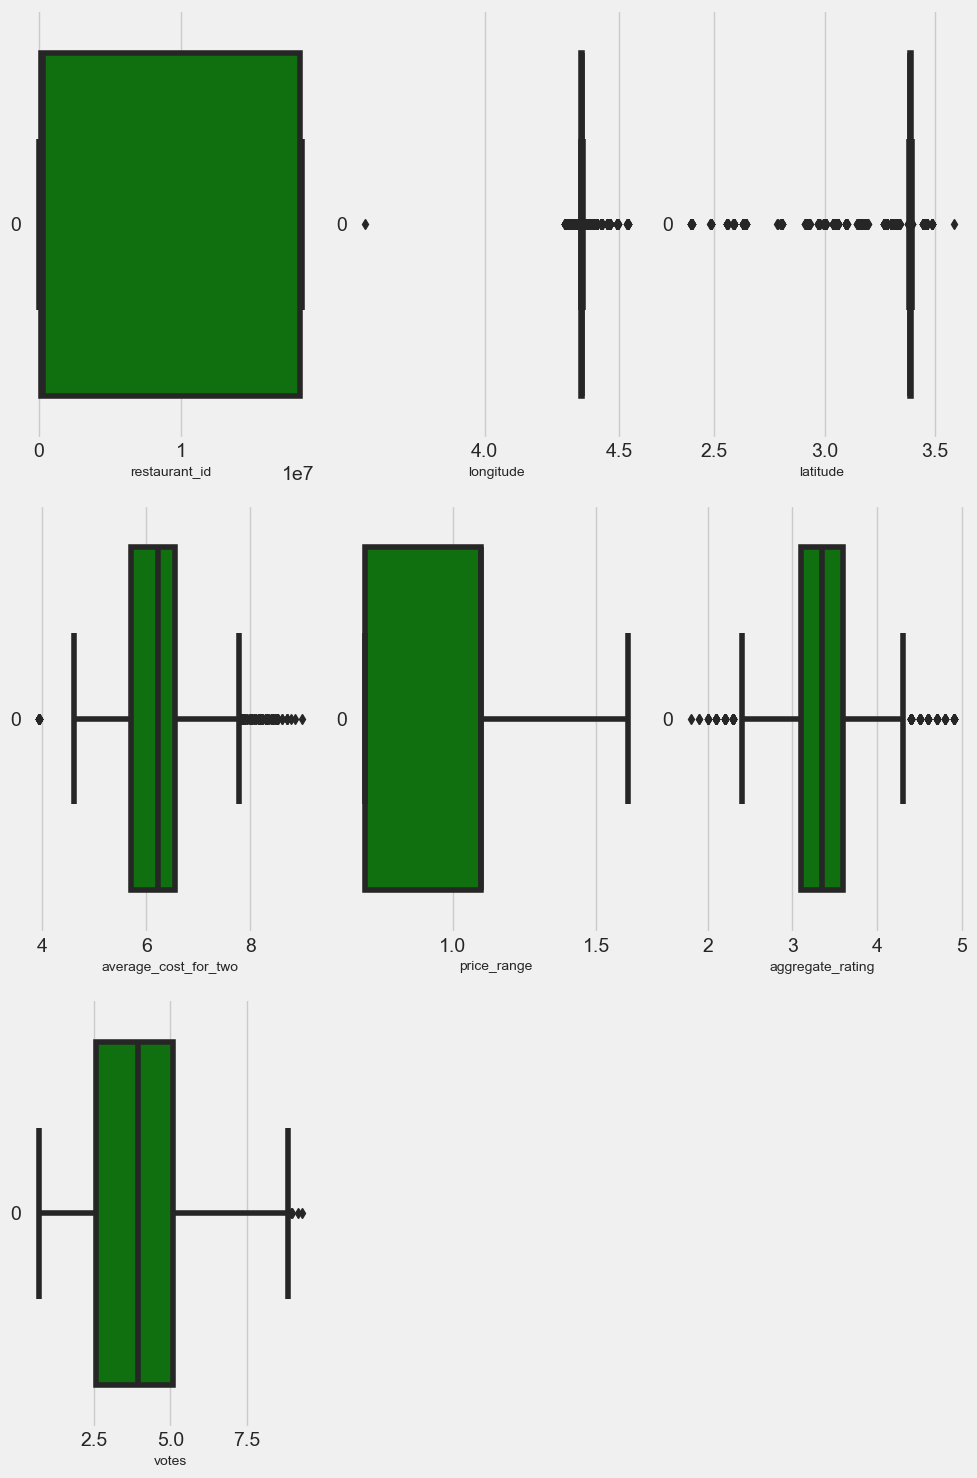

In [58]:
i=0
plt.figure(figsize=(10,15))
for column in df7.select_dtypes(np.number).columns:
    plt.subplot(3,3,i+1)
    sns.boxplot(df7[column],color='green',orient='h')
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()

In [59]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [60]:
df7= remove_outliers(df7,'aggregate_rating')
df7= remove_outliers(df7,'average_cost_for_two')

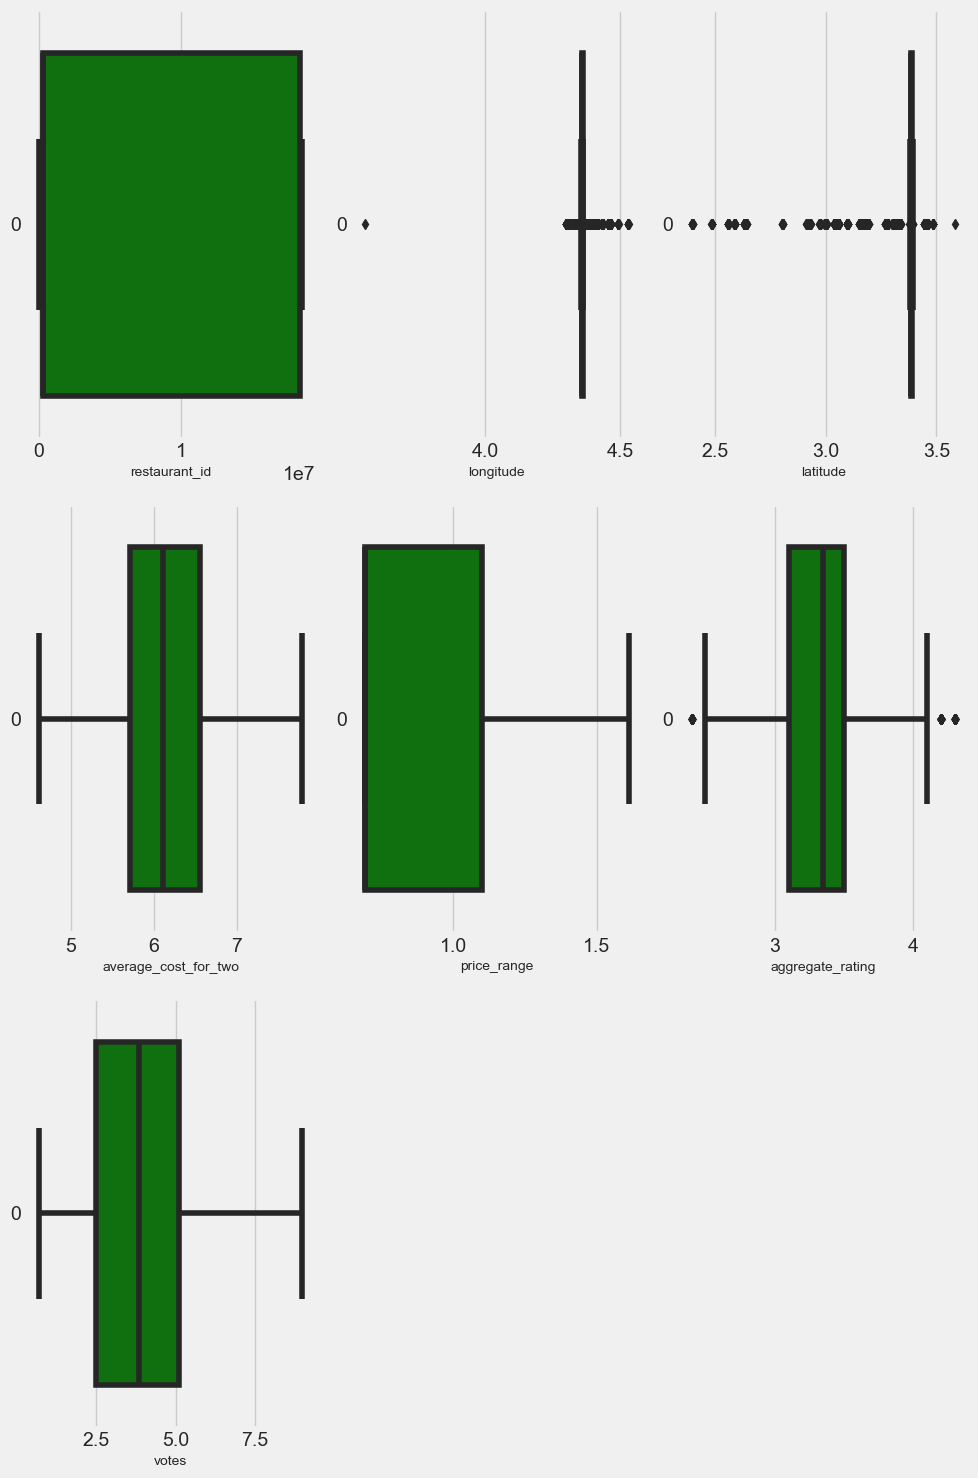

In [61]:
i=0
plt.figure(figsize=(10,15))
for column in df7.select_dtypes(np.number).columns:
    plt.subplot(3,3,i+1)
    sns.boxplot(df7[column],color='green',orient='h')
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()

In [62]:
df8=df7.copy()

In [63]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7687 entries, 0 to 8154
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         7687 non-null   int64  
 1   city                  7687 non-null   object 
 2   locality_verbose      7687 non-null   object 
 3   longitude             7687 non-null   float64
 4   latitude              7687 non-null   float64
 5   cuisines              7687 non-null   object 
 6   average_cost_for_two  7687 non-null   float64
 7   has_table_booking     7687 non-null   object 
 8   has_online_delivery   7687 non-null   object 
 9   is_delivering_now     7687 non-null   object 
 10  price_range           7687 non-null   float64
 11  aggregate_rating      7687 non-null   float64
 12  rating_color          7687 non-null   object 
 13  rating_text           7687 non-null   object 
 14  votes                 7687 non-null   float64
dtypes: float64(6), int64(1), o

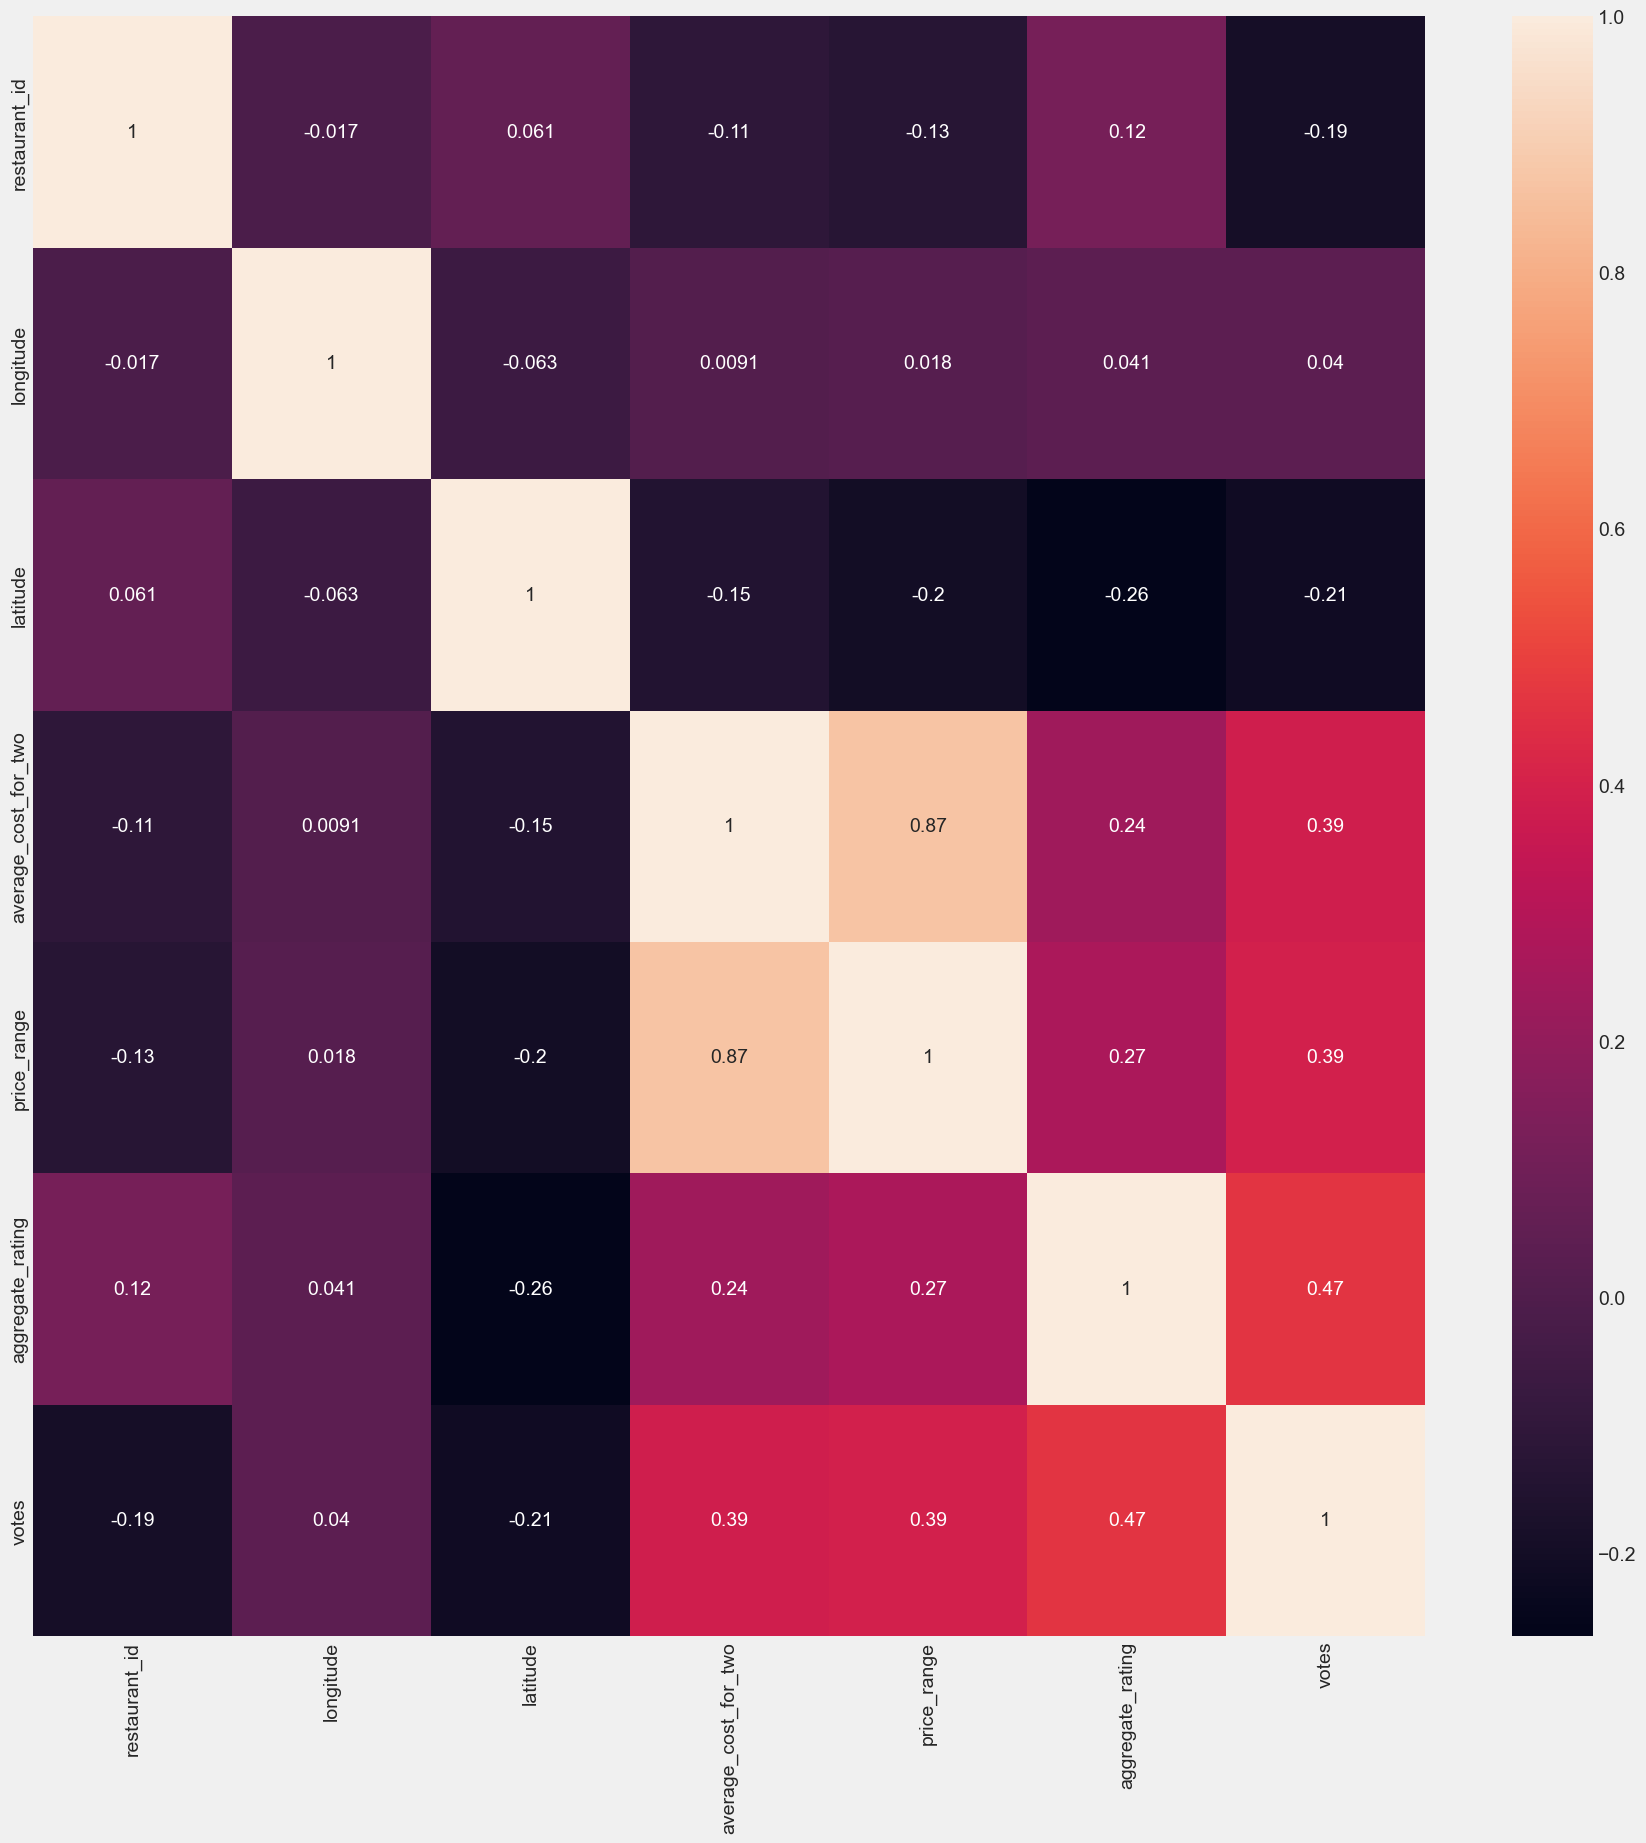

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df8 is your DataFrame
numeric_columns = df8.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 20))
sns.heatmap(df8[numeric_columns].corr(), annot=True)
plt.xticks(rotation=90)
plt.show()


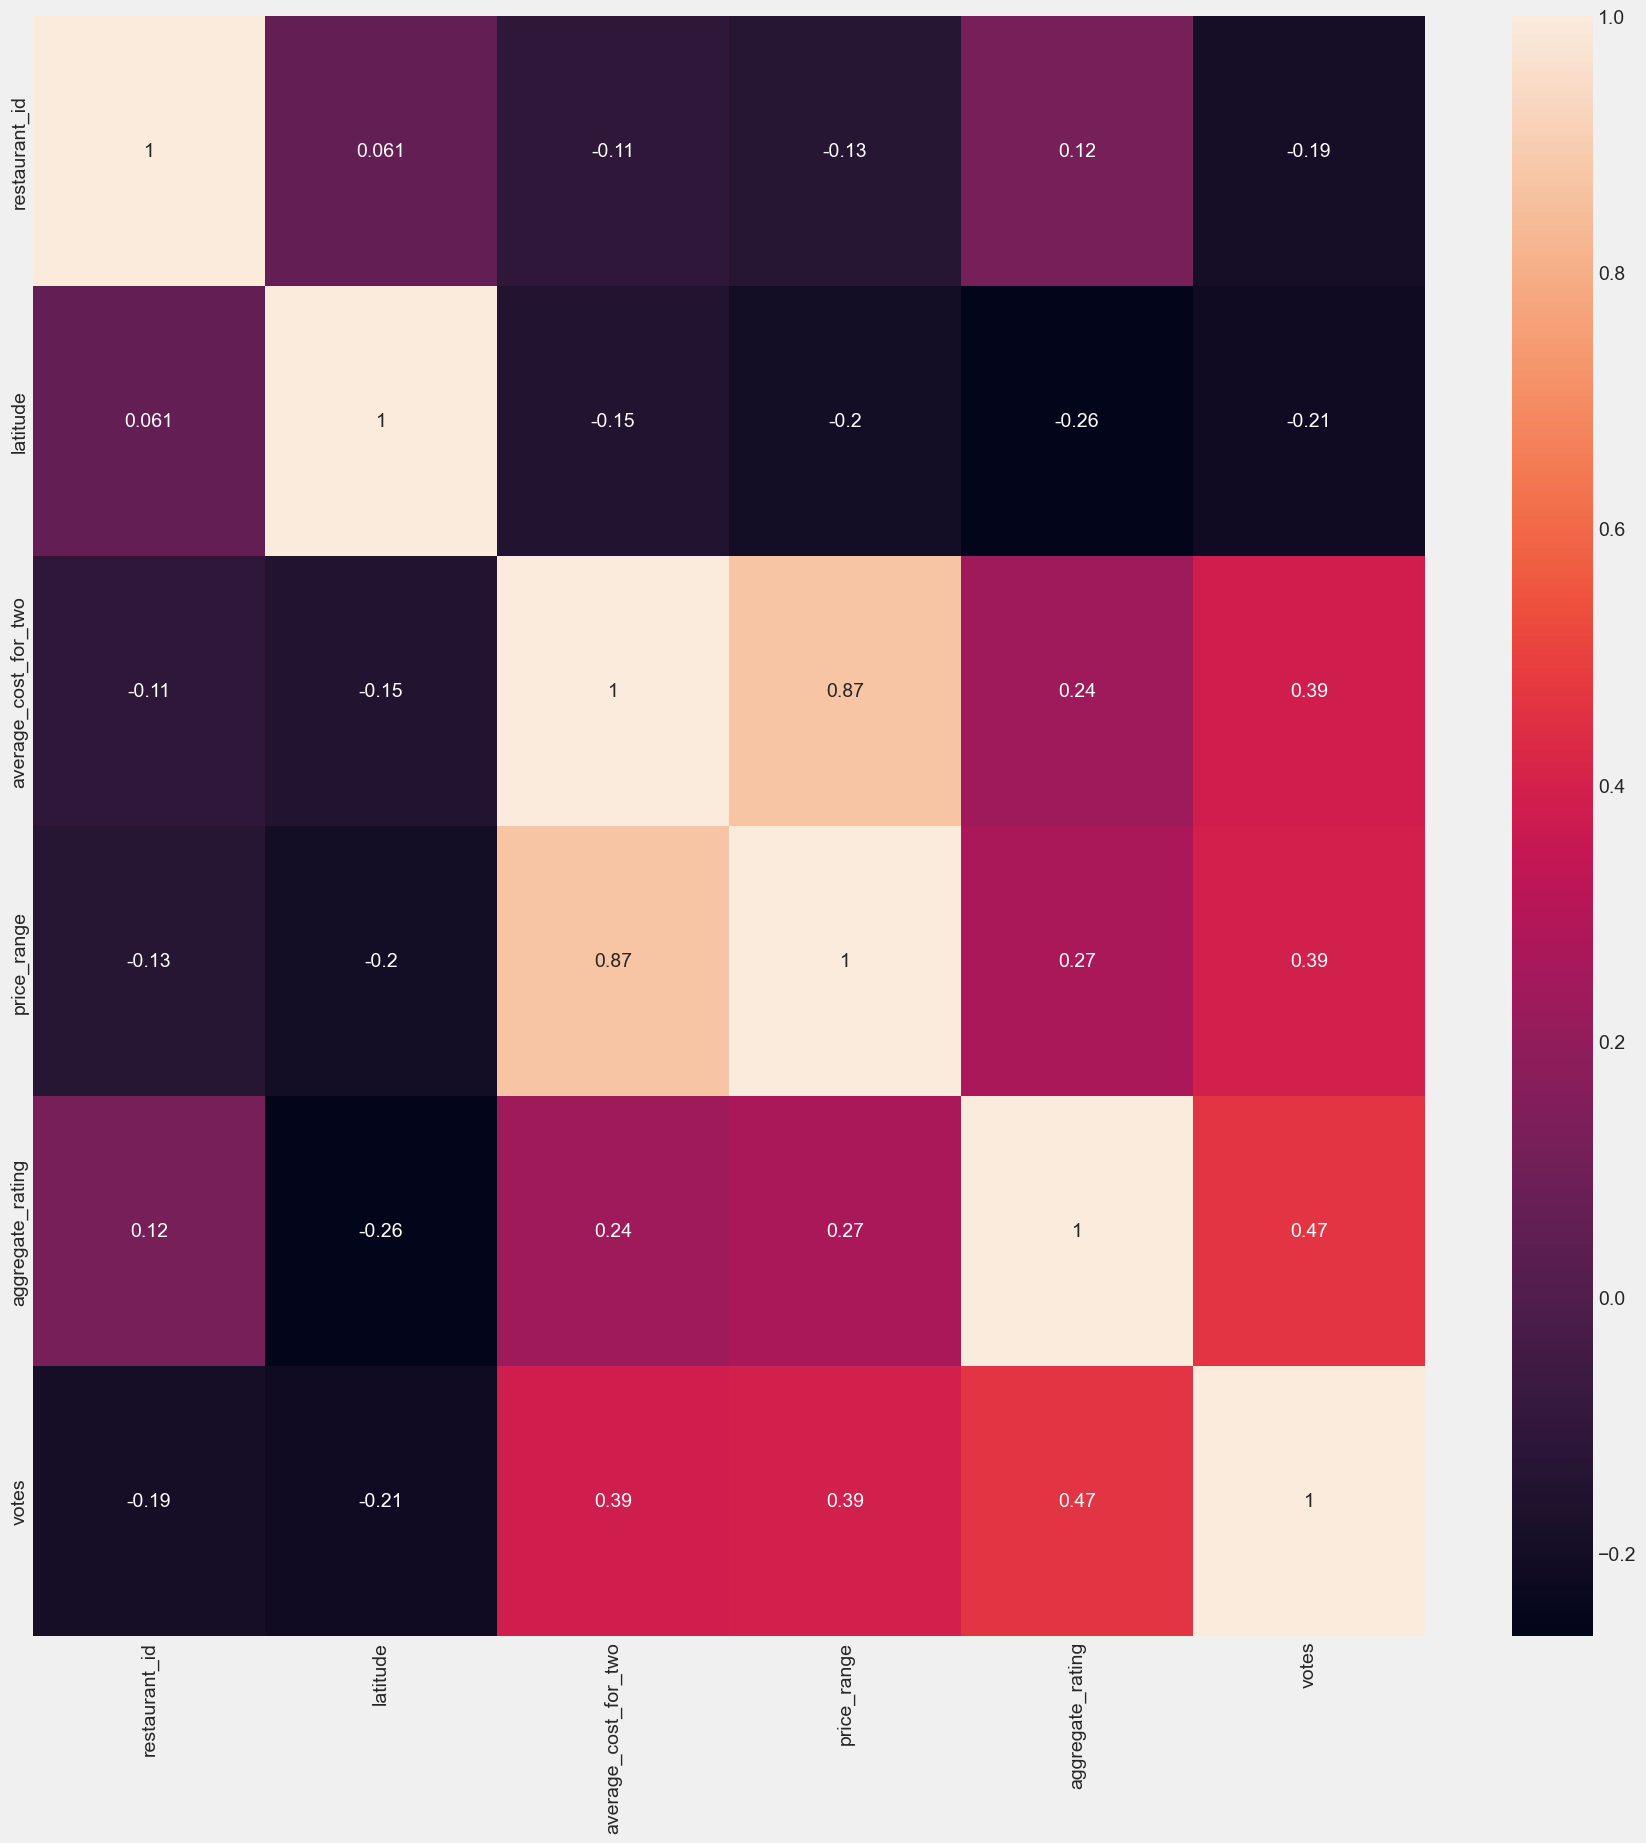

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df8 is your DataFrame
numeric_columns = df8.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_table = abs(df8[numeric_columns].corr()['average_cost_for_two'])
corr_table = corr_table[corr_table > 0.1]

# Select the predictor variables
predictor_variables = list(corr_table.index)

# Create a DataFrame with selected features
df_ML = df8[predictor_variables]

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_ML.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def calculate_VIF(df8):
    VIF = pd.DataFrame()
    all_VIF = []
    VIF["predictors"] = df8.keys()
    for i in range(df8.shape[1]):
        var_VIF = variance_inflation_factor(df8.values,i)
        all_VIF.append(var_VIF)
    VIF["VIF"] = all_VIF
    return VIF

df_ML_VIF = calculate_VIF(df_ML.iloc[:,:-1])
df_ML_VIF["Target_correlation"] = abs(df_ML.corr()["average_cost_for_two"]).reset_index(drop=True)
df_ML_VIF.sort_values(by="Target_correlation",ascending=False)

predictors         VIF  Target_correlation
2  average_cost_for_two  308.375625            1.000000
3           price_range   52.738875            0.868521
4      aggregate_rating   71.037041            0.235922
1              latitude  165.400486            0.149672
0         restaurant_id    1.978818            0.107100

In [68]:
df_ML_VIF["survivors"] = np.where((df_ML_VIF["Target_correlation"] < 0.4) & (df_ML_VIF["VIF"] > 22),0,1)
final_predictor = df_ML_VIF["predictors"][df_ML_VIF["survivors"]==1]
df_ML_2 = df_ML[list(final_predictor) + ['average_cost_for_two']]

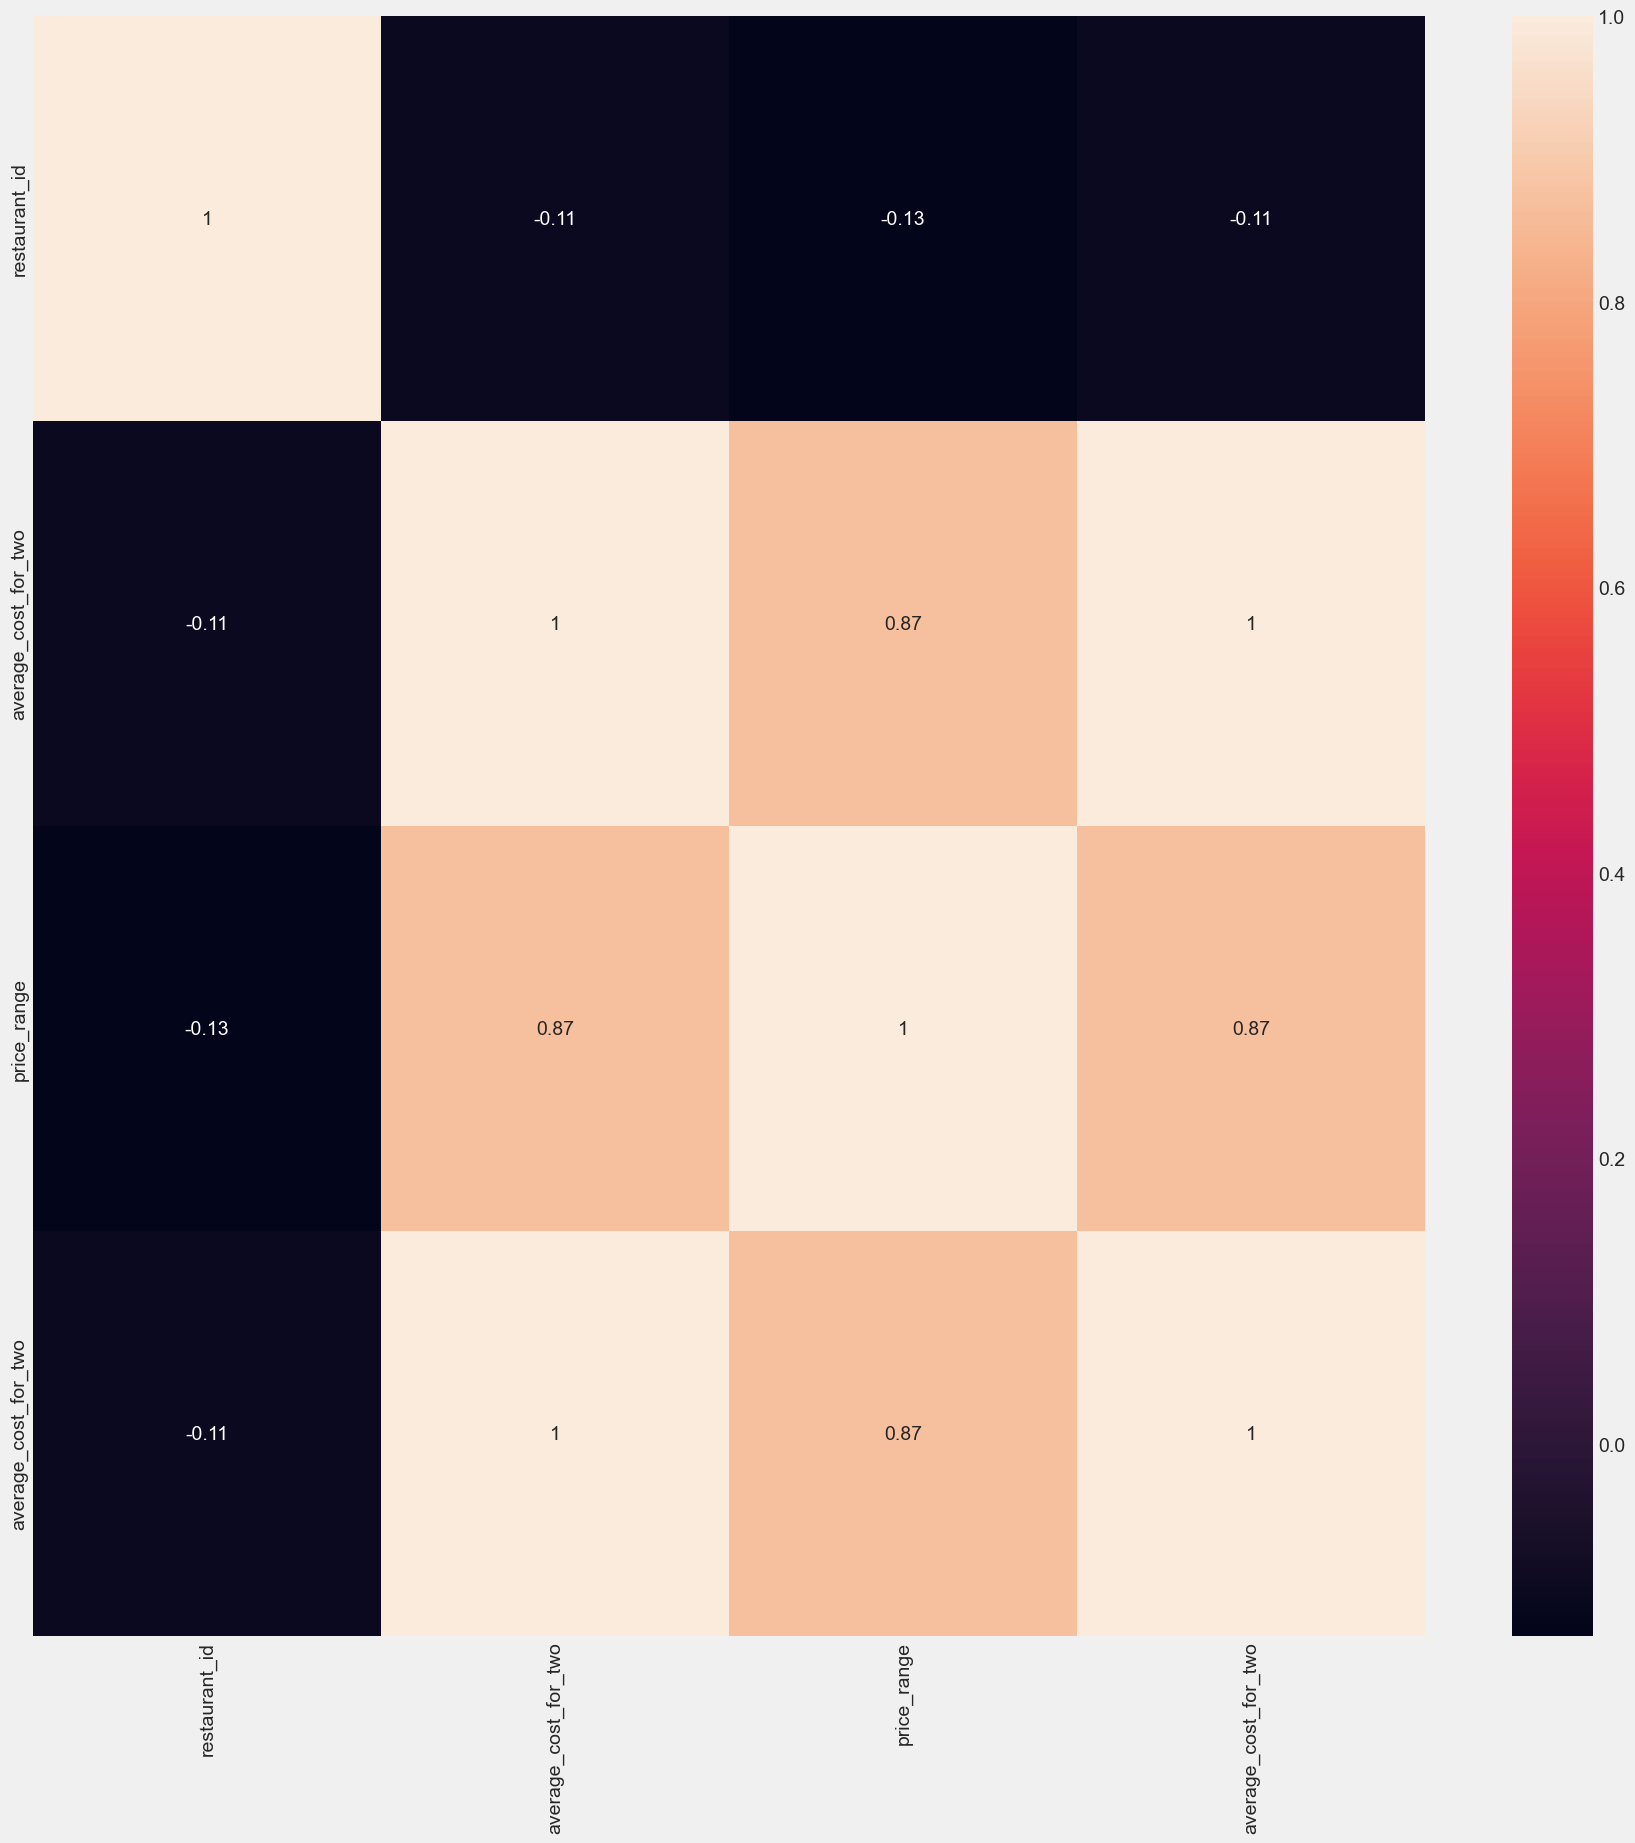

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ML_2.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

In [70]:
calculate_VIF(df_ML_2.iloc[:,:-1])

predictors        VIF
0         restaurant_id   1.908791
1  average_cost_for_two  30.482523
2           price_range  27.699030

In [71]:
df8['city'].value_counts().shape

(42,)

In [72]:
df8['locality_verbose'].value_counts().shape

(745,)

In [73]:
df8['cuisines'].value_counts().shape

(1199,)

In [74]:
df8['has_table_booking'].value_counts().shape

(2,)

## encoding

In [75]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df8['has_table_booking']= label_encoder.fit_transform(df8['has_table_booking'])
df8['has_online_delivery']= label_encoder.fit_transform(df8['has_online_delivery'])
df8['is_delivering_now']= label_encoder.fit_transform(df8['is_delivering_now'])
df8['rating_color']= label_encoder.fit_transform(df8['rating_color'])
df8['rating_text']= label_encoder.fit_transform(df8['rating_text'])

In [76]:
df9=df8.copy()

In [77]:
df9

restaurant_id   city              locality_verbose  longitude  latitude  \
0           3400025   Agra              Agra Cantt, Agra   4.369594  3.337962   
1           3400005   Agra              Agra Cantt, Agra   4.369595  3.337932   
2           3400021   Agra             Civil Lines, Agra   4.369424  3.339178   
3           3400017   Agra             Civil Lines, Agra   4.369543  3.339383   
7           3400073   Agra   Radisson Blu, Tajganj, Agra   4.370170  3.338020   
...             ...    ...                           ...        ...       ...   
8150       18285610  Vizag             MVP Colony, Vizag   4.434436  2.929951   
8151        2800128  Vizag             Rushikonda, Vizag   4.435364  2.932998   
8152        2800100  Vizag            Sagar Nagar, Vizag   4.435110  2.931955   
8153        2800881  Vizag              Siripuram, Vizag   4.434563  2.929568   
8154        2800042  Vizag  The Park, Lawsons Bay, Vizag   4.434819  2.929656   

                                               cuisines  average_cost_for_two  \
0                                 North Indian, Mughlai              6.746412   
1                                          North Indian              6.216606   
2                                            Rajasthani              5.993961   
3                        North Indian, Chinese, Mughlai              6.908755   
7                    North Indian, Chinese, Continental              6.216606   
...                                                 ...                   ...   
8150  South Indian, Chinese, Continental, Italian, N...              6.398595   
8151                                    Biryani, Andhra              6.111467   
8152  Continental, Seafood, Chinese, North Indian, B...              6.398595   
8153                             Burger, Pizza, Biryani              6.398595   
8154          American, North Indian, Thai, Continental              7.313887   

      has_table_booking  has_online_delivery  is_delivering_now  price_range  \
0                     0                    0                  0     1.386294   
1                     0                    0                  0     1.098612   
2                     0                    0                  0     1.098612   
3                     0                    0                  0     1.386294   
7                     0                    0                  0     0.693147   
...                 ...                  ...                ...          ...   
8150                  0                    0                  0     1.098612   
8151                  0                    0                  0     1.098612   
8152                  0                    0                  0     1.098612   
8153                  0                    0                  0     1.098612   
8154                  0                    0                  0     1.609438   

      aggregate_rating  rating_color  rating_text     votes  
0                  3.9             4            1  4.948760  
1                  3.6             4            1  4.553877  
2                  4.0             0            4  4.477337  
3                  4.2             0            4  5.181784  
7                  3.9             4            1  4.644391  
...                ...           ...          ...       ...  
8150               4.1             0            4  4.330733  
8151               4.0             0            4  5.135798  
8152               3.6             4            1  5.267858  
8153               4.3             0            4  5.153292  
8154               3.8             4            1  4.317488  

[7687 rows x 15 columns]

In [78]:
list_hot_encoded = []
for column in df9.columns:
    if(df9[column].dtypes==object):
        df9= pd.concat([df9, pd.get_dummies(df9[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)

df9 = df9.drop(list_hot_encoded, axis=1)

In [79]:
df10=df9.copy()

In [80]:
df10 

restaurant_id  longitude  latitude  average_cost_for_two  \
0           3400025   4.369594  3.337962              6.746412   
1           3400005   4.369595  3.337932              6.216606   
2           3400021   4.369424  3.339178              5.993961   
3           3400017   4.369543  3.339383              6.908755   
7           3400073   4.370170  3.338020              6.216606   
...             ...        ...       ...                   ...   
8150       18285610   4.434436  2.929951              6.398595   
8151        2800128   4.435364  2.932998              6.111467   
8152        2800100   4.435110  2.931955              6.398595   
8153        2800881   4.434563  2.929568              6.398595   
8154        2800042   4.434819  2.929656              7.313887   

      has_table_booking  has_online_delivery  is_delivering_now  price_range  \
0                     0                    0                  0     1.386294   
1                     0                    0                  0     1.098612   
2                     0                    0                  0     1.098612   
3                     0                    0                  0     1.386294   
7                     0                    0                  0     0.693147   
...                 ...                  ...                ...          ...   
8150                  0                    0                  0     1.098612   
8151                  0                    0                  0     1.098612   
8152                  0                    0                  0     1.098612   
8153                  0                    0                  0     1.098612   
8154                  0                    0                  0     1.609438   

      aggregate_rating  rating_color  ...  cuisines_Tibetan  \
0                  3.9             4  ...             False   
1                  3.6             4  ...             False   
2                  4.0             0  ...             False   
3                  4.2             0  ...             False   
7                  3.9             4  ...             False   
...                ...           ...  ...               ...   
8150               4.1             0  ...             False   
8151               4.0             0  ...             False   
8152               3.6             4  ...             False   
8153               4.3             0  ...             False   
8154               3.8             4  ...             False   

      cuisines_Tibetan, Chinese  cuisines_Tibetan, Chinese, North Indian  \
0                         False                                    False   
1                         False                                    False   
2                         False                                    False   
3                         False                                    False   
7                         False                                    False   
...                         ...                                      ...   
8150                      False                                    False   
8151                      False                                    False   
8152                      False                                    False   
8153                      False                                    False   
8154                      False                                    False   

      cuisines_Tibetan, Fast Food  cuisines_Tibetan, Nepalese  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                           False                       False   
7                           False                       False   
...                           ...                         ...   
8150                        False                       False   
8151                        False                       False 

In [81]:
X=df10.drop('average_cost_for_two',axis=1)
X

y=df10['average_cost_for_two']
y

0       6.746412
1       6.216606
2       5.993961
3       6.908755
7       6.216606
          ...   
8150    6.398595
8151    6.111467
8152    6.398595
8153    6.398595
8154    7.313887
Name: average_cost_for_two, Length: 7687, dtype: float64

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [85]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((5765, 1997), (5765,), (1922, 1997), (1922,))

In [86]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [87]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)



Explained_variance:  -1.8794184244479775e+28
R2:  -1.879707632194845e+28
Adjusted_r2:  4.751208370324075e+29
MAE:  27727149922997.14
MSE:  8.668220153182155e+27
RMSE:  93103276812269.9
Accuracy: -2122886075275943676490526228480.00 %
Standard Deviation: 446185955606629870348777029632.00 %


# 2.RandomForestRegressor

In [90]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)



Explained_variance:  0.8521
R2:  0.8521
Adjusted_r2:  4.7377
MAE:  0.1909
MSE:  0.0682
RMSE:  0.2611
Accuracy: 83.24 %
Standard Deviation: 1.19 %


# 3. DecisionTreeRegressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)




Explained_variance:  0.7427
R2:  0.7427
Adjusted_r2:  7.5026
MAE:  0.2364
MSE:  0.1186
RMSE:  0.3444
Accuracy: 71.06 %
Standard Deviation: 1.61 %


# 4.SVR

In [92]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)



Explained_variance:  0.658
R2:  0.6578
Adjusted_r2:  9.6499
MAE:  0.2908
MSE:  0.1578
RMSE:  0.3973
Accuracy: 65.48 %
Standard Deviation: 1.15 %


# 5.KNeighborsRegressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)


Explained_variance:  0.309
R2:  0.2881
Adjusted_r2:  18.994
MAE:  0.439
MSE:  0.3283
RMSE:  0.573
Accuracy: 31.81 %
Standard Deviation: 3.28 %


# 6.XGBRegressor

In [94]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)



Explained_variance:  0.8549
R2:  0.8547
Adjusted_r2:  4.6721
MAE:  0.1923
MSE:  0.067
RMSE:  0.2588
Accuracy: 84.25 %
Standard Deviation: 0.85 %


# 7.Lasso

In [95]:
ls = Lasso()
ls=Lasso(random_state=10)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)



Explained_variance:  0.0
R2:  -0.0008
Adjusted_r2:  26.2961
MAE:  0.5375
MSE:  0.4615
RMSE:  0.6793
Accuracy: -0.13 %
Standard Deviation: 0.10 %


# 8.Ridge

In [96]:
rd = Ridge()
rd=Ridge(random_state=10)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

regression_results(y_test,y_pred_rd)
model_accuracy(rd)



Explained_variance:  0.8224
R2:  0.8207
Adjusted_r2:  5.5314
MAE:  0.2228
MSE:  0.0827
RMSE:  0.2875
Accuracy: 80.58 %
Standard Deviation: 0.68 %


# 9.AdaBoostRegressor

In [97]:
abr = AdaBoostRegressor()
abr=AdaBoostRegressor(random_state=10)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

regression_results(y_test,y_pred_abr)
model_accuracy(abr)



Explained_variance:  0.788
R2:  0.7758
Adjusted_r2:  6.6663
MAE:  0.2538
MSE:  0.1034
RMSE:  0.3215
Accuracy: 76.86 %
Standard Deviation: 0.63 %


# 10.GradientBoostingRegressor

In [98]:
gbr = GradientBoostingRegressor()
gbr=GradientBoostingRegressor(random_state=10)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

regression_results(y_test,y_pred_gbr)
model_accuracy(gbr)



Explained_variance:  0.8466
R2:  0.8463
Adjusted_r2:  4.8844
MAE:  0.2046
MSE:  0.0709
RMSE:  0.2662
Accuracy: 83.02 %
Standard Deviation: 0.73 %



# Hyperparameter tuning using GridSearchCV

In [99]:
parameters = {"n_estimators":[5,50,250],
            "max_depth":[1,3,5,7],
            "learning_rate":[0.01,0.1,1,10]}

In [100]:







grd = GridSearchCV(xgbr, param_grid = parameters, verbose=True, n_jobs=-1)

In [101]:
best_clf = grd.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [102]:
best_clf.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [103]:
best_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

Explained_variance:  0.8568
R2:  0.8567
Adjusted_r2:  4.6224
MAE:  0.1936
MSE:  0.0661
RMSE:  0.2571
Accuracy: 84.35 %
Standard Deviation: 0.83 %


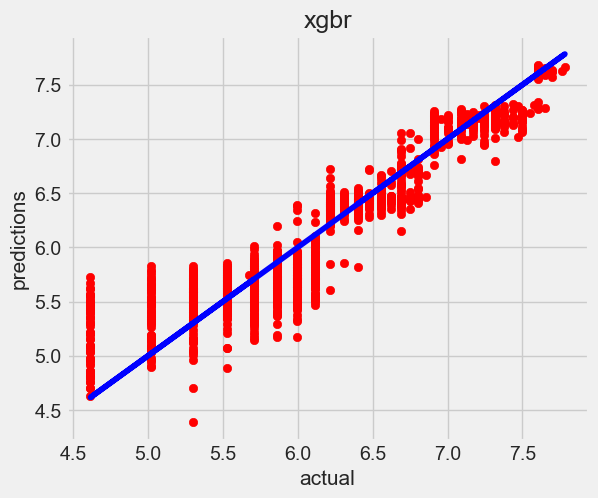

In [104]:
xgbr=XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=250)
xgbr.fit(X_train, y_train)
y_pred1 = xgbr.predict(X_test)

regression_results(y_test,y_pred1)
model_accuracy(xgbr)



## accuracy has increased positively

# saving the model

In [105]:
filename='zomato1.pkl'
pickle.dump(xgbr,open(filename,'wb'))

# part-2  Price range

In [106]:
df11=df10.copy()

In [107]:
X=df11.drop('price_range',axis=1)
X

y=df11['price_range']
y

0       1.386294
1       1.098612
2       1.098612
3       1.386294
7       0.693147
          ...   
8150    1.098612
8151    1.098612
8152    1.098612
8153    1.098612
8154    1.609438
Name: price_range, Length: 7687, dtype: float64

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [110]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [111]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#  LinearRegression

Explained_variance:  -2.3034370044252927e+28
R2:  -2.3066028521396633e+28
Adjusted_r2:  5.83024220915828e+29
MAE:  12343427434647.348
MSE:  1.7601549326038152e+27
RMSE:  41954200416690.28
Accuracy: -2285196298758867569818132807680.00 %
Standard Deviation: 273740446686708978303729926144.00 %


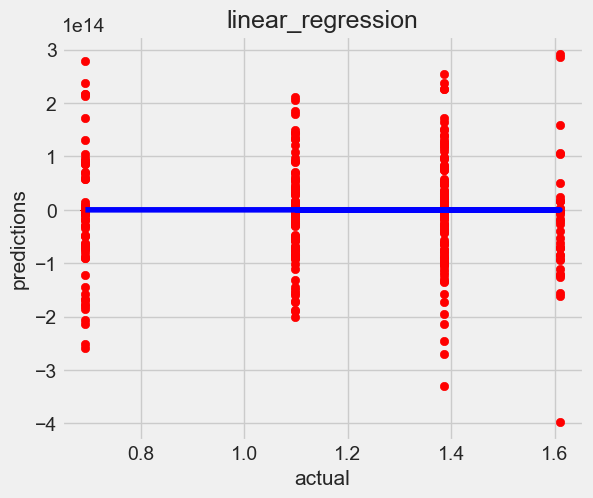

In [113]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

# RandomForestRegressor

Explained_variance:  0.9911
R2:  0.9911
Adjusted_r2:  1.2239
MAE:  0.0035
MSE:  0.0007
RMSE:  0.026
Accuracy: 98.74 %
Standard Deviation: 0.23 %


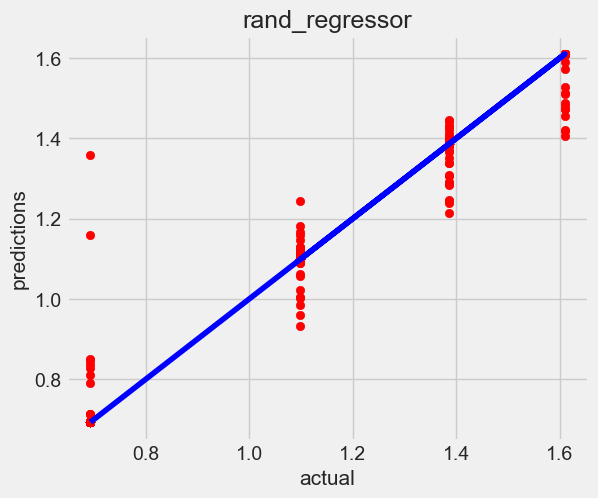

In [114]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

# DecisionTreeRegressor

Explained_variance:  0.9852
R2:  0.9852
Adjusted_r2:  1.3732
MAE:  0.0027
MSE:  0.0011
RMSE:  0.0336
Accuracy: 98.05 %
Standard Deviation: 0.40 %


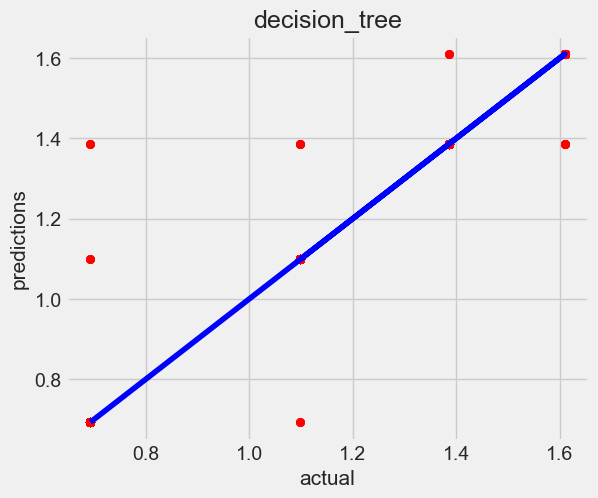

In [115]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


# SVR

Explained_variance:  0.6121
R2:  0.6101
Adjusted_r2:  10.8542
MAE:  0.1333
MSE:  0.0297
RMSE:  0.1725
Accuracy: 59.32 %
Standard Deviation: 1.20 %


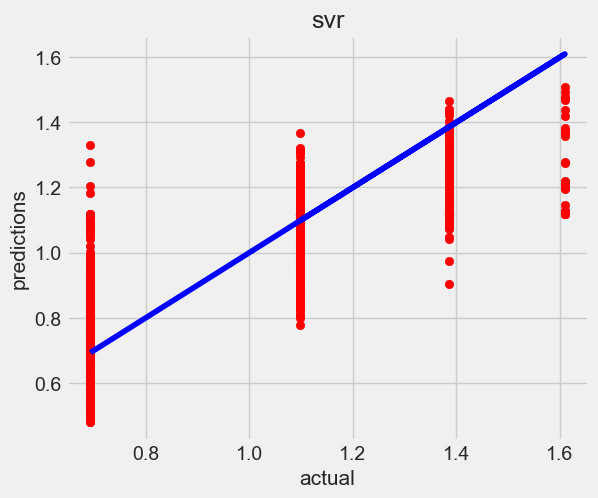

In [116]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

# KNeighborsRegressor

Explained_variance:  0.3635
R2:  0.3432
Adjusted_r2:  17.6018
MAE:  0.1529
MSE:  0.0501
RMSE:  0.2239
Accuracy: 27.31 %
Standard Deviation: 2.33 %


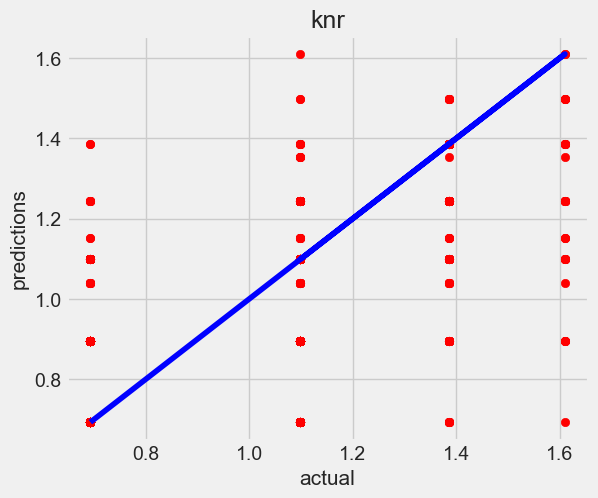

In [117]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

# XGBRegressor

Explained_variance:  0.9901
R2:  0.9901
Adjusted_r2:  1.2494
MAE:  0.0041
MSE:  0.0008
RMSE:  0.0274
Accuracy: 98.70 %
Standard Deviation: 0.24 %


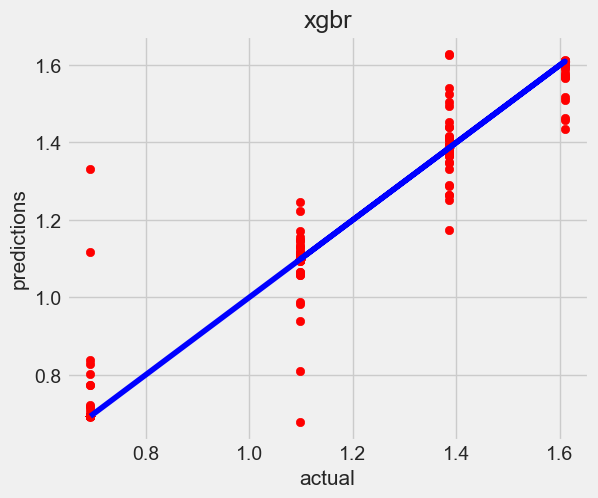

In [118]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

# Lasso

Explained_variance:  0.0
R2:  -0.0012
Adjusted_r2:  26.3054
MAE:  0.2529
MSE:  0.0764
RMSE:  0.2764
Accuracy: -0.08 %
Standard Deviation: 0.09 %


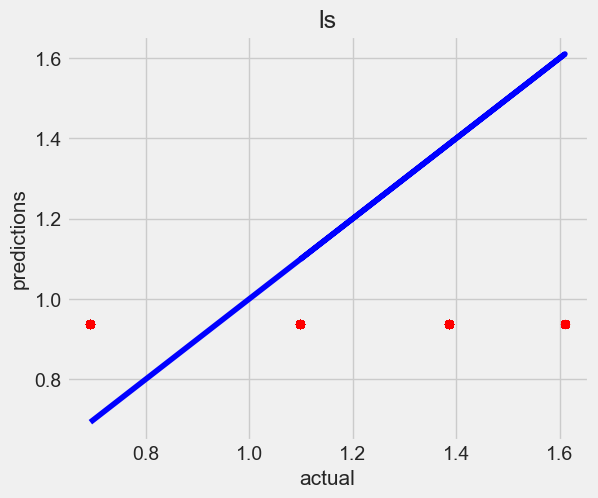

In [119]:
ls = Lasso()
ls=Lasso(random_state=10)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_ls, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('ls', fontsize = 18)
plt.show()

# Ridge

Explained_variance:  0.781
R2:  0.7789
Adjusted_r2:  6.5878
MAE:  0.1049
MSE:  0.0169
RMSE:  0.1299
Accuracy: 77.24 %
Standard Deviation: 0.96 %


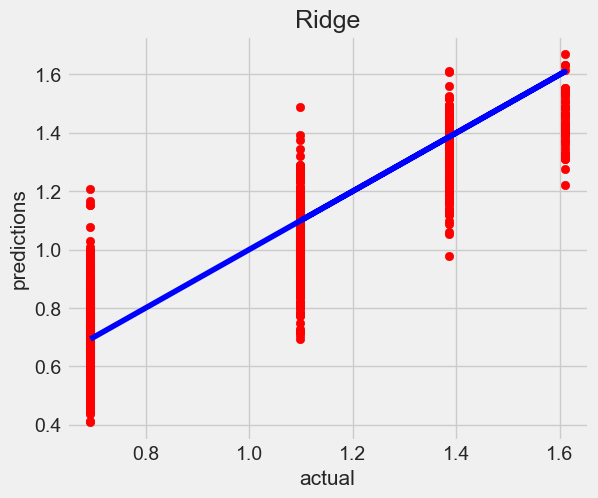

In [120]:
rd = Ridge()
rd=Ridge(random_state=10)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

regression_results(y_test,y_pred_rd)
model_accuracy(rd)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rd, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Ridge', fontsize = 18)
plt.show()

# AdaBoostRegressor

Explained_variance:  0.9811
R2:  0.978
Adjusted_r2:  1.5566
MAE:  0.0233
MSE:  0.0017
RMSE:  0.041
Accuracy: 92.58 %
Standard Deviation: 4.29 %


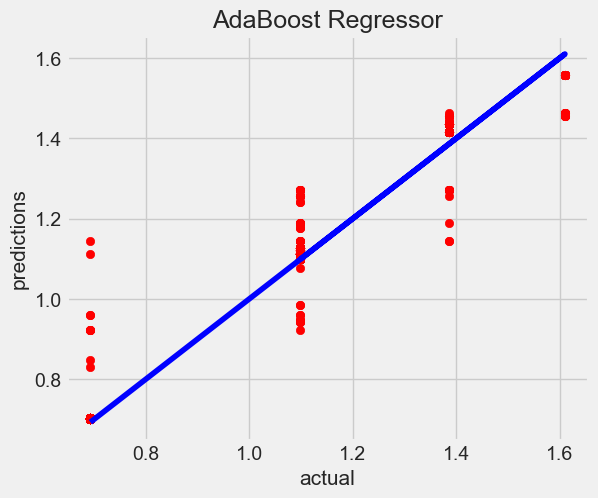

In [121]:
abr = AdaBoostRegressor()
abr=AdaBoostRegressor(random_state=10)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

regression_results(y_test,y_pred_abr)
model_accuracy(abr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_abr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('AdaBoost Regressor', fontsize = 18)
plt.show()

# GradientBoostingRegressor

Explained_variance:  0.9882
R2:  0.9882
Adjusted_r2:  1.2978
MAE:  0.0074
MSE:  0.0009
RMSE:  0.03
Accuracy: 98.70 %
Standard Deviation: 0.21 %


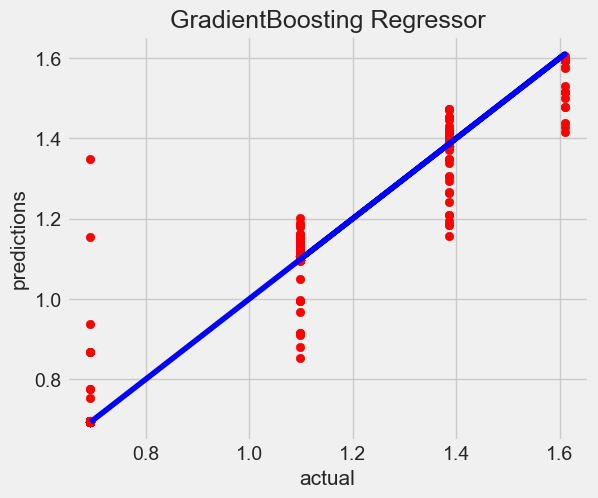

In [122]:
gbr = GradientBoostingRegressor()
gbr=GradientBoostingRegressor(random_state=10)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

regression_results(y_test,y_pred_gbr)
model_accuracy(gbr)



## model random forest has highest accuracy so, we will tune this model.

# hyperparameter tuning

In [123]:
param_grid={'bootstrap': [True], 
            'max_depth': [5, 10, None], 
            'max_features': ['auto', 'log2'], 
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
           }

In [124]:
grid_search=GridSearchCV(estimator=rand_regressor, param_grid=param_grid,n_jobs=-1)

In [125]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [126]:
best_param =grid_search.best_params_
print(best_param)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


In [128]:
grid_search=RandomForestRegressor(bootstrap=True,max_depth=None,max_features='log2',n_estimators=11)
grid_search.fit(X_train,y_train)
y_pred1=grid_search.predict(X_test)
regression_results(y_test,y_pred1)
model_accuracy(grid_search)



Explained_variance:  0.7945
R2:  0.7937
Adjusted_r2:  6.2135
MAE:  0.0892
MSE:  0.0157
RMSE:  0.1255
Accuracy: 84.06 %
Standard Deviation: 3.75 %


In [129]:
filename='zomato2.pkl'
pickle.dump(rand_regressor,open(filename,'wb'))